# Introduction

U.S. Fertility Rate has dropped to its lowest in 2019. In this dataset, I am going to use a data set from UCI Machine Learning Respository. This project will focus on 100 volunteers who donated their sperm. The objective of this project is to predict if semen will be normal or altered from volunteers' past history. 

# Import Libaries

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

# Read File 

In [37]:
fertility = pd.read_csv('fertility_Diagnosis.csv')

Features:
 
Season in which the analysis was performed. 1) winter, 2) spring, 3) Summer, 4) fall. (-1, -0.33, 0.33, 1)

Age at the time of analysis. 18-36 (0, 1)

Childish diseases (ie , chicken pox, measles, mumps, polio) 1) yes, 2) no. (0, 1)

Accident or serious trauma 1) yes, 2) no. (0, 1)

Surgical intervention 1) yes, 2) no. (0, 1)

High fevers in the last year 1) less than three months ago, 2) more than three months ago, 3) no. (-1, 0, 1)

Frequency of alcohol consumption 1) several times a day, 2) every day, 3) several times a week, 4) once a week, 5) hardly ever or never (0, 1)

Smoking habit 1) never, 2) occasional 3) daily. (-1, 0, 1)

Number of hours spent sitting per day ene-16 (0, 1)

Output: Diagnosis normal (N), altered (O)

In [38]:
fertility.head()

,Season,Age at time of analysis,Childish Disease,Accident or Serious Trauma,Surgical Intervention,High Fevers in the last year,Frequency of alcohol Consumption,Smoking Habit,Number of Hours sitting Per Day,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O


In [39]:
fertility.describe()

,Season,Age at time of analysis,Childish Disease,Accident or Serious Trauma,Surgical Intervention,High Fevers in the last year,Frequency of alcohol Consumption,Smoking Habit,Number of Hours sitting Per Day
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-0.078900,0.669000,0.870000,0.440000,0.510000,0.190000,0.832000,-0.350000,0.406800
std,0.796725,0.121319,0.337998,0.498888,0.502418,0.580752,0.167501,0.808728,0.186395
min,-1.000000,0.500000,0.000000,0.000000,0.000000,-1.000000,0.200000,-1.000000,0.060000
25%,-1.000000,0.560000,1.000000,0.000000,0.000000,0.000000,0.800000,-1.000000,0.250000
50%,-0.330000,0.670000,1.000000,0.000000,1.000000,0.000000,0.800000,-1.000000,0.380000
75%,1.000000,0.750000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Check for Missing Values

In [40]:
fertility.isnull().sum()

Season                              0
Age at time of analysis             0
Childish Disease                    0
Accident or Serious Trauma          0
Surgical Intervention               0
High Fevers in the last year        0
Frequency of alcohol Consumption    0
Smoking Habit                       0
Number of Hours sitting Per Day     0
Output                              0
dtype: int64

It looks like there are no missing vales for this data set, let us proceed to clean the data. 

# Data Cleaning 

One of the biggest thing that stood out for me is the first column: season. The data comes as numperical values, but I think it would be more appropriate to covert it to its appropriate text and then use convert it to dummy variables. Another reason why I deecided to do this is because it can help with data visualization

In [41]:
fertility['Season'].replace([-1,-.33,.33,1],['Winter','spring','Summer','fall'],inplace = True)

In [42]:
fertility.head()

,Season,Age at time of analysis,Childish Disease,Accident or Serious Trauma,Surgical Intervention,High Fevers in the last year,Frequency of alcohol Consumption,Smoking Habit,Number of Hours sitting Per Day,Output
0,spring,0.69,0,1,1,0,0.8,0,0.88,N
1,spring,0.94,1,0,1,0,0.8,1,0.31,O
2,spring,0.50,1,0,0,0,1.0,-1,0.50,N
3,spring,0.75,0,1,1,0,1.0,-1,0.38,N
4,spring,0.67,1,1,0,0,0.8,-1,0.50,O


I will then do the same for High Fevers in the last year and smoking habit

In [43]:
fertility['High Fevers in the last year'].replace([-1,0,1],['less than three months ago','more than three months ago','none'],inplace=True)
fertility['Smoking Habit'].replace([-1,0,1],['Never','Occasional','daily'],inplace=True)

In [44]:
fertility.head()

,Season,Age at time of analysis,Childish Disease,Accident or Serious Trauma,Surgical Intervention,High Fevers in the last year,Frequency of alcohol Consumption,Smoking Habit,Number of Hours sitting Per Day,Output
0,spring,0.69,0,1,1,more than three months ago,0.8,Occasional,0.88,N
1,spring,0.94,1,0,1,more than three months ago,0.8,daily,0.31,O
2,spring,0.50,1,0,0,more than three months ago,1.0,Never,0.50,N
3,spring,0.75,0,1,1,more than three months ago,1.0,Never,0.38,N
4,spring,0.67,1,1,0,more than three months ago,0.8,Never,0.50,O


since we are trying to predict if the output is normal or altered, I will change 'N' to 0 and 'O' to 1. 

In [45]:
fertility['Output'].replace(['N','O'],[0,1],inplace = True)

In [46]:
fertility.head()

,Season,Age at time of analysis,Childish Disease,Accident or Serious Trauma,Surgical Intervention,High Fevers in the last year,Frequency of alcohol Consumption,Smoking Habit,Number of Hours sitting Per Day,Output
0,spring,0.69,0,1,1,more than three months ago,0.8,Occasional,0.88,0
1,spring,0.94,1,0,1,more than three months ago,0.8,daily,0.31,1
2,spring,0.50,1,0,0,more than three months ago,1.0,Never,0.50,0
3,spring,0.75,0,1,1,more than three months ago,1.0,Never,0.38,0
4,spring,0.67,1,1,0,more than three months ago,0.8,Never,0.50,1


Now that that is done, lets perform some data visualzation 

# Data Visualization

In [47]:
fertility.columns

Index(['Season', 'Age at time of analysis', 'Childish Disease',
       'Accident or Serious Trauma', 'Surgical Intervention',
       'High Fevers in the last year', 'Frequency of alcohol Consumption',
       'Smoking Habit', 'Number of Hours sitting Per Day', 'Output'],
      dtype='object')

I want to see the fertility rate of women who have normal diagnosis compared to altered Diagnosis

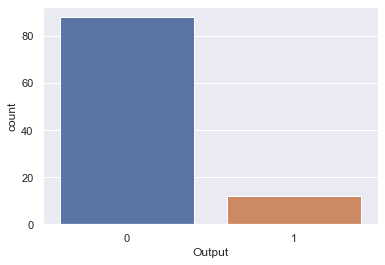

In [48]:
sns.countplot(x='Output',data = fertility)

Next I am going to look to see if seasons play a role in fertility rate

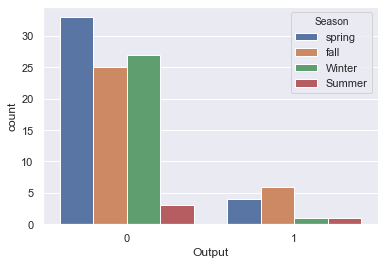

In [49]:
sns.countplot(x='Output',data = fertility, hue = 'Season')

by looking at the data, there seem to be fewer men donating semen in summer compared to other seasons for a normal diagnogis. However, for altered diagnosis, it seems fall patient to be higher. I am then going to see if alcohol consumption will affect sperm fertality 

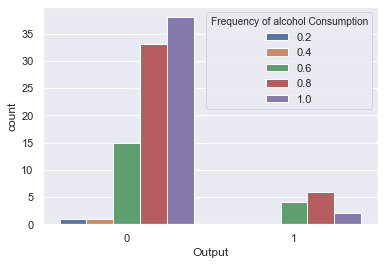

In [50]:
sns.countplot(x='Output',data = fertility, hue = 'Frequency of alcohol Consumption')

It looks like alcohol consumption does not have an impact in fertility rate. I am going to look at surgical intervention for any report

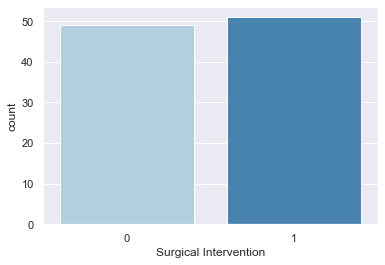

In [51]:
sns.countplot(x='Surgical Intervention',data = fertility,palette='Blues')

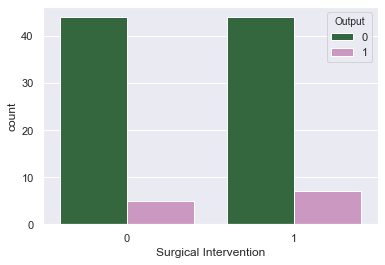

In [72]:
sns.countplot(x='Surgical Intervention',data = fertility,palette='cubehelix',hue='Output')

Surgical intervention waas interesting because it looks like surgical intervention will not create a cause for fertility. 

I now want to see if there's any strong correlation with diagnosis. In order to perform this, I will check the correlation. 

In [53]:
fertility.corr()

,Age at time of analysis,Childish Disease,Accident or Serious Trauma,Surgical Intervention,Frequency of alcohol Consumption,Number of Hours sitting Per Day,Output
Age at time of analysis,1.000000,0.080551,0.215958,0.271945,-0.247940,-0.442452,0.115229
Childish Disease,0.080551,1.000000,0.162936,-0.140972,0.038538,-0.147761,-0.040261
Accident or Serious Trauma,0.215958,0.162936,1.000000,0.103166,-0.242722,0.013122,-0.141346
Surgical Intervention,0.271945,-0.140972,0.103166,1.000000,-0.075858,-0.192726,0.054171
Frequency of alcohol Consumption,-0.247940,0.038538,-0.242722,-0.075858,1.000000,0.111371,-0.144760
Number of Hours sitting Per Day,-0.442452,-0.147761,0.013122,-0.192726,0.111371,1.000000,0.022964
Output,0.115229,-0.040261,-0.141346,0.054171,-0.144760,0.022964,1.000000


Time to convert our categorical features into dummy variables

In [54]:
fertility = pd.get_dummies(fertility)

In [55]:
fertility.head()

,Age at time of analysis,Childish Disease,Accident or Serious Trauma,Surgical Intervention,Frequency of alcohol Consumption,Number of Hours sitting Per Day,Output,Season_Summer,Season_Winter,Season_fall,Season_spring,High Fevers in the last year_less than three months ago,High Fevers in the last year_more than three months ago,High Fevers in the last year_none,Smoking Habit_Never,Smoking Habit_Occasional,Smoking Habit_daily
0,0.69,0,1,1,0.8,0.88,0,0,0,0,1,0,1,0,0,1,0
1,0.94,1,0,1,0.8,0.31,1,0,0,0,1,0,1,0,0,0,1
2,0.50,1,0,0,1.0,0.50,0,0,0,0,1,0,1,0,1,0,0
3,0.75,0,1,1,1.0,0.38,0,0,0,0,1,0,1,0,1,0,0
4,0.67,1,1,0,0.8,0.50,1,0,0,0,1,0,1,0,1,0,0


The reason why I did not scale the data is because the values are close to each other. If they are far away, then I would scale it.

# Train/Test Split

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x = fertility.drop('Output',axis=1)
y = fertility['Output']

In [58]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=101)

Logistic Regression 

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
lr = LogisticRegression()

fit our training set

In [61]:
lr.fit(x_train,y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
pred = lr.predict(x_test)

# Evaluation Metrics 

In [63]:
from sklearn.metrics import confusion_matrix, classification_report

In [64]:
print(confusion_matrix(y_test,pred))

[[28  0]
 [ 2  0]]


In [65]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        28
           1       0.00      0.00      0.00         2

    accuracy                           0.93        30
   macro avg       0.47      0.50      0.48        30
weighted avg       0.87      0.93      0.90        30



C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Looking at our score, we have a very good score with an accuracy score of 93%. Lets see if we can improve it with random forest classifier

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rfc = RandomForestClassifier(n_estimators=100)

fitting our testing data in random forest

In [68]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [69]:
rfc_pred = rfc.predict(x_test)

In [70]:
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[28  0]
 [ 2  0]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        28
           1       0.00      0.00      0.00         2

    accuracy                           0.93        30
   macro avg       0.47      0.50      0.48        30
weighted avg       0.87      0.93      0.90        30



C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Conclusion

With the given data set, our model was able to predict 93% for sperm volunteers where the Diagnosis is normal. However, it was unable to predict the altered diagnosis. Why is this the case? I think one of the reason due to its data set. The data set for this is only 100 and majority of the data is towards 'normal' instead of 'altered'.